## Choose ODE parameters

In [ ]:
from millard_ode.Millard_dicts import ode_parameters_dict,ode_parameter_ranges_dict
import numpy as np

# Generate parameters for ODE, with uniform random for parameters with ranges
new_ode_parameters = ode_parameters_dict.copy()
# for p in ode_parameter_ranges_dict.keys():
#     new_ode_parameters[p]= np.random.uniform(*ode_parameter_ranges_dict[p])

print(new_ode_parameters)

{'v_max_Pta': 5227420.536280954, 'Km_ACCOA_Pta': 0.2, 'Km_P': 2.6, 'Ki_P': 2.6, 'Ki_ACP': 0.2, 'Km_COA': 0.029, 'Km_ACP_Pta': 0.7, 'P': 10, 'COA': 1.22, 'Keq_Pta': 0.0281, 'v_max_AckA': 351084.998445465, 'ADP': 0.606, 'Km_ACP_AckA': 0.16, 'Km_ADP': 0.5, 'Km_ACE_AckA': 7, 'ATP': 2.4, 'Km_ATP': 0.07, 'Keq_AckA': 174, 'v_max_TCA_cycle': 17443452.060044933, 'Km_ACCOA_TCA_cycle': 382.83333798448496, 'v_sink': 39553.964309360796, 'Y': 0.00025002198836830003, 'volume': 0.00177, 'Ki_ACE_TCA_cycle': 100.26131940691702, 'Km_ACE_acetate_exchange': 554.2916951384051, 'v_max_acetate_exchange': 79746072.49607177, 'v_growth_rate': 3.947654032948833, 'r_TRP_Ki': 60, 'v_glc_uptake': 9.80047500380069, 'v_ace_net': 22.324528765957282, 'D': 0, 'v_feed': 0, '_X_conc_pulse': 10000, 'Initial for Y': 9.98042573450618e-05, 'Initial for _X_conc_pulse': 10000, 'Initial for _dilution_rate': 0, 'Initial for _feed': 0, 'Initial for volume': 0.00177, 'v_max_glycolysis': 8557686.184130358, 'Km_GLC': 0.02, 'Ki_ACE_gly

## Solve ODE with chosen parameters

In [16]:

from scipy.integrate import solve_ivp
from millard_ode.deriv_equations_Millard import deriv_Millard


# Initial conditions used by Millard
GLC_1_0 = 12.89999655
ACE_env_1_0 = 0.9200020244
X_1_0 = 0.06999993881

#Eyeball estimated initial conditions
ACCOA_1_0 = 0.27305
ACP_1_0 = 0.063
ACE_cell_1_0 = 1.035

# Initial conditions vector
y_1_0 = [GLC_1_0, ACE_env_1_0, X_1_0, ACCOA_1_0, ACP_1_0, ACE_cell_1_0] 



## Load experimental data and score the parameters

In [17]:
import os
from numpy import genfromtxt
from millard_ode.tools import ssr_error
from millard_ode.Millard_dicts import variable_standard_deviations_dict
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from millard_ode.deriv_equations_Millard import deriv_Millard
from millard_ode.Millard_dicts import ode_parameters_dict,ode_parameter_ranges_dict
import numpy as np

DATA_FILE = "./data/"

# Load experimental data
data_1mM = genfromtxt(os.path.join(DATA_FILE,'data_1mM.csv'), delimiter=',')
data_t_1mM = data_1mM[1:, 0]  

observables = ["GLC","ACE_env","X"]
variable_data = {"GLC": data_1mM[1:, 3], "ACE_env": data_1mM[1:, 1], "X":data_1mM[1:, 2]}
variable_no_data  = {"ACCOA":None,"ACP":None,"ACE_cell":None}
data_t = data_t_1mM

# Solve the ODE with given parameters (ode_parameter_dict)
res = solve_ivp(fun=deriv_Millard,
                t_span=(0,4.25),
                y0=y_1_0,
                method='LSODA',
                args=(new_ode_parameters,),
                t_eval = data_t,
                dense_output=True)

res_t = res.t
GLC, ACE_env, X, ACCOA, ACP, ACE_cell = res.y

variable_res = {"GLC":GLC, 
                "ACE_env":ACE_env, 
                "X":X, 
                "ACCOA":ACCOA, 
                "ACP":ACP, 
                "ACE_cell":ACE_cell}

ssr_error(variable_standard_deviations_dict,
          observables=observables,
          variable_data=variable_data,
          variable_res=variable_res,
         )

57029.98221658854

## Visualize ODE prediction with experimental data

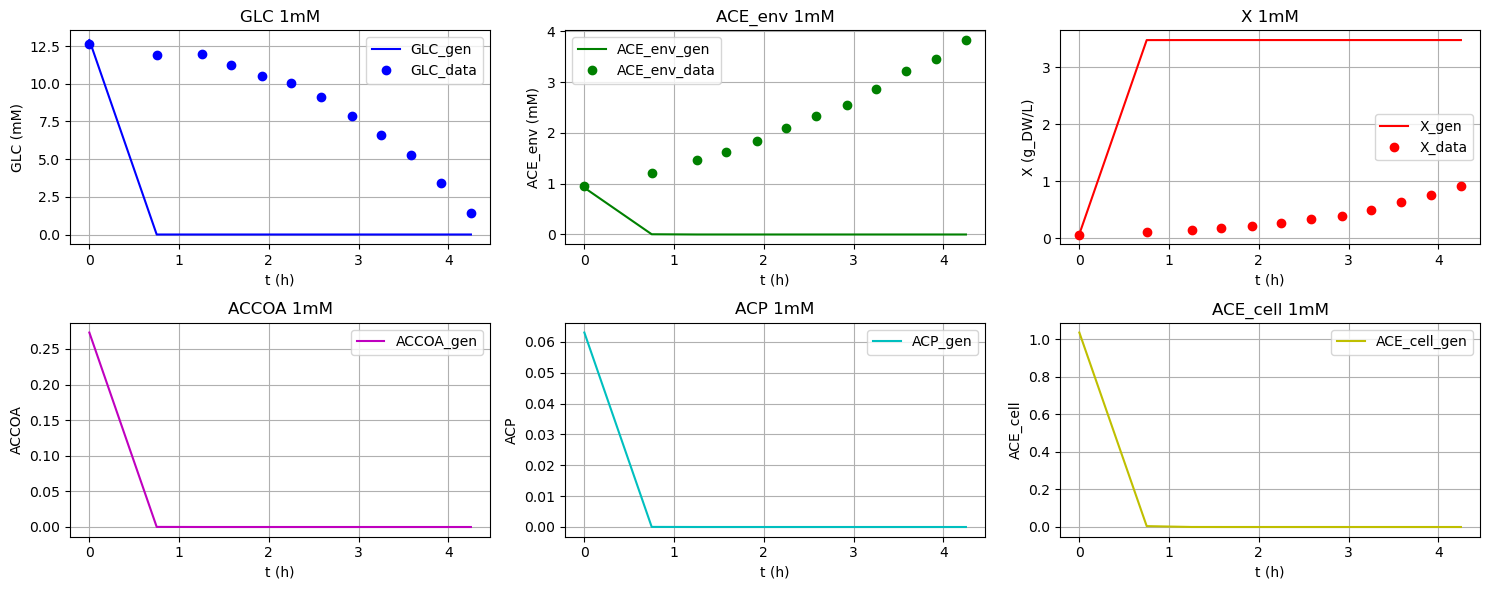

In [18]:
import matplotlib.pyplot as plt

GLC, ACE_env, X, ACCOA, ACP, ACE_cell = res.y

# Load calibration data 
ode_data_1 = genfromtxt(os.path.join(DATA_FILE,'data_1mM.csv'), delimiter=',')

data_t = ode_data_1[1:, 0]  

# Plot everything
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

axs[0,0].plot(res.t, GLC, label='GLC_gen', color='b')
axs[0,0].plot(data_t, ode_data_1[1:, 3], 'o', label='GLC_data', color='b')
axs[0,0].set_title('GLC 1mM')
axs[0,0].set_xlabel('t (h)')
axs[0,0].set_ylabel('GLC (mM)')
axs[0,0].legend()
axs[0,0].grid(True)

axs[0,1].plot(res.t, ACE_env, label='ACE_env_gen', color='g')
axs[0,1].plot(data_t, ode_data_1[1:, 1], 'o', label='ACE_env_data', color='g')
axs[0,1].set_title('ACE_env 1mM')
axs[0,1].set_xlabel('t (h)')
axs[0,1].set_ylabel('ACE_env (mM)')
axs[0,1].legend()
axs[0,1].grid(True)

axs[0,2].plot(res.t, X,label='X_gen', color='r')
axs[0,2].plot(data_t, ode_data_1[1:, 2], 'o',label='X_data', color='r')
axs[0,2].set_title('X 1mM')
axs[0,2].set_xlabel('t (h)')
axs[0,2].set_ylabel('X (g_DW/L)')
axs[0,2].legend()
axs[0,2].grid(True)

axs[1,0].plot(res.t, ACCOA, label='ACCOA_gen', color='m')
axs[1,0].set_title('ACCOA 1mM')
axs[1,0].set_xlabel('t (h)')
axs[1,0].set_ylabel('ACCOA')
axs[1,0].legend()
axs[1,0].grid(True)

axs[1,1].plot(res.t, ACP, label='ACP_gen', color='c')
axs[1,1].set_title('ACP 1mM')
axs[1,1].set_xlabel('t (h)')
axs[1,1].set_ylabel('ACP')
axs[1,1].legend()
axs[1,1].grid(True)

axs[1,2].plot(res.t, ACE_cell,label='ACE_cell_gen', color='y')
axs[1,2].set_title('ACE_cell 1mM')
axs[1,2].set_xlabel('t (h)')
axs[1,2].set_ylabel('ACE_cell')
axs[1,2].legend()
axs[1,2].grid(True)

plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd


def generate_log_uniform(range_tuple, size=1):
    """
    Generates points with a uniform distribution in the logarithmic scale 
    between the values in the range_tuple (e.g., (1e3, 1e7)).
    
    Parameters:
    range_tuple (tuple): The range (lower, upper) in the original scale.
    size (int): The number of points to generate. Default is 1.
    
    Returns:
    numpy.ndarray: Array of generated points with logarithmic uniform distribution.
    """
    # Step 1: Extract lower and upper bounds from the input range
    lower, upper = range_tuple
    
    # Step 2: Compute the logarithms (base 10) of the lower and upper bounds
    log_lower = np.log10(lower)
    log_upper = np.log10(upper)
    
    # Step 3: Generate random numbers uniformly between log_lower and log_upper
    log_uniform = np.random.uniform(log_lower, log_upper, size)
    
    # Step 4: Convert back to the original scale by exponentiating
    points = 10 ** log_uniform

        # Return a single point if size is 1, otherwise return the array
    if size == 1:
        return points[0]  # Return the first element as a float
    return points  # Return the array for larger sizes


def generate_random_parameters(ode_parameters_dict, ode_parameter_ranges_dict, num_cases=100):
    random_parameters = []
    
    for _ in range(num_cases):
        # Make a copy of the original ODE parameters
        new_ode_parameters = ode_parameters_dict.copy()
        
        # Update parameters with values generated from the ranges
        for p, param_range in ode_parameter_ranges_dict.items():
            # Use the generate_log_uniform function to sample within the range
            new_ode_parameters[p] = generate_log_uniform(param_range)
        
        random_parameters.append(new_ode_parameters)
    
    return random_parameters


def generate_training_data(ode_function, t_span, y0, parameter_cases):
    training_data = []
    for params in parameter_cases:
        res = solve_ivp(fun=ode_function, 
                        t_span=t_span, 
                        y0=y0, 
                        method='BDF', 
                        args=(params,), dense_output=True)
        training_data.append((params, res.y))  # Collect parameters and the result
    return training_data

# Define a function for log transformation
def log_transform(X):
    return np.log(np.array(X) + 1)  # Add 1 to avoid log(0)

def build_neural_network(input_shape, output_shape):
    single_model = models.Sequential()
    single_model.add(layers.Input(shape=(input_shape,)))
    single_model.add(layers.Dense(64, activation='relu'))
    single_model.add(layers.Dense(32, activation='relu'))
    single_model.add(layers.Dense(output_shape))  # Output layer matching the solve_ivp output dimensions
    single_model.compile(optimizer='adam', loss='mse')
    return single_model

from sklearn.preprocessing import FunctionTransformer
# Create the FunctionTransformer
log_transformer = FunctionTransformer(func=log_transform, validate=False)

def train_ensemble(x_train, y_train, num_models=3):
    # Ensure x_train and y_train are numpy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    input_shape = x_train.shape[1]  # The number of features/parameters
    print(f'input_shape : {input_shape}')
    
    output_shape = y_train.shape[1] if len(y_train.shape) > 1 else 1  # The dimension of the solve_ivp output
    print(f'output_shape : {output_shape}')
    
    model_ensemble = []

    # Log transformation
    x_train_log = log_transformer.fit_transform(x_train)

    for _ in range(num_models):
        # Build and compile model
        single_model = build_neural_network(input_shape, output_shape)
        
        # Train the model
        single_model.fit(x_train_log, y_train, epochs=10, batch_size=32, verbose=0)
        
        # Append to ensemble
        model_ensemble.append(single_model)
    
    return model_ensemble

def generate_and_predict(model_ensemble, parameter_ranges, num_cases=1000):
    # Generate random parameters
    new_cases = generate_random_parameters(ode_parameters_dict, parameter_ranges, num_cases)
    
    # Prepare to collect x_test values
    x_tests = []
    
    # Collect x_test for all cases
    for case in new_cases:
        # Extract changed parameters and reshape into an array
        changed_params = {key: case[key] for key in ode_parameter_ranges_dict.keys()}
        x_test = np.array(list(changed_params.values())).reshape(1, -1)
        x_tests.append(x_test)
    
    # Transform all x_test cases at once
    x_tests_array = np.vstack(x_tests)  # Stack to create a 2D array
    x_tests_log = log_transformer.transform(x_tests_array)  # Log transform
    
    # Predict with all models in the ensemble
    preds = np.array([single_model.predict(x_tests_log) for single_model in model_ensemble])

    # Average the predictions and calculate standard deviation
    avg_preds = np.mean(preds, axis=0)
    std_preds = np.std(preds, axis=0)
    
    # Structure the predictions to maintain the original parameter shape
    predictions = []
    for i, case in enumerate(new_cases):
        # Ensure avg_pred and std_pred have the correct shape
        predictions.append((case, avg_preds[i].flatten(), std_preds[i].flatten()))

    return predictions

def select_best_cases(predictions, real_data, top_n=50):
    errors = []
    real_data = pd.DataFrame(real_data).to_numpy().flatten()
    
    for params, pred, std in predictions:
        error = np.linalg.norm(pred - real_data)  # can use different error metrics
        errors.append((params, pred, std, error))
    
    # Sort by the error and select the top N
    errors.sort(key=lambda x: x[3])  # Sorting based on the error (4th element)
    
    best_cases = errors[:top_n]  # Keep the entire tuples (params, pred, extra_info, error)
    
    return best_cases


def calculate_ssr_errors(best_cases, ssr_error_fn, real_data, ode_function, t_span, y0):
    ssr_errors = []
    for params, _, _, _ in best_cases:
        res = solve_ivp(fun=ode_function, t_span=t_span, y0=y0, method='BDF', 
                        args=(params,), dense_output=True)
        
        GLC, ACE_env, X, ACCOA, ACP, ACE_cell = res.y

        variable_res = {"GLC":GLC, 
                        "ACE_env":ACE_env, 
                        "X":X, 
                        "ACCOA":ACCOA, 
                        "ACP":ACP, 
                        "ACE_cell":ACE_cell}
        
        ssr = ssr_error_fn(variable_standard_deviations_dict, 
                           observables=["GLC","ACE_env","X"], 
                           variable_data=real_data, 
                           variable_res=variable_res)
        ssr_errors.append((params, ssr))
    return ssr_errors

def run_ode_simulation(ode_function, t_span, y0, params, data_t, ode_parameter_ranges_dict):
    """
    Runs an ODE simulation using the provided ODE function and parameters.
    
    Parameters:
        ode_function (callable): The function that defines the ODEs.
        t_span (tuple): A tuple specifying the start and end times for the simulation (t0, t1).
        y0 (array-like): Initial conditions for the ODE system.
        params (dict): Dictionary of parameters for the ODE function.
        data_t (array-like): Time points for which results should be interpolated.
        ode_parameter_ranges_dict (dict): Dictionary of parameters that were changed.
        
    Returns:
        tuple: A tuple containing:
            - filter_variable_res: Filtered results as a 2D NumPy array.
            - parameters_for_training: List of parameters that were changed.
    """
    
    # Solve the ODE using solve_ivp
    res = solve_ivp(ode_function, t_span, y0, method='BDF', args=(params,), dense_output=True, max_step = 100)
    
    # Only keep the parameters that were changed
    changed_params = {key: params[key] for key in ode_parameter_ranges_dict.keys()}
    
    # Extract results from the ODE solution
    GLC, ACE_env, X, *_ = res.y
    
    # Prepare results in a DataFrame and convert to NumPy array
    variable_res = pd.DataFrame({
        "X": X,
        "GLC": GLC,
        "ACE_env": ACE_env
    }).to_numpy()
    
    # Interpolating to ensure consistent time points across all cases
    consistent_time_points = data_t  # Use the real data time points
    ode_time = res.t

    # Initialize a list for filtered results
    filter_variable_res = []

    for t in consistent_time_points:
        # Find the index of the closest value in ode_time
        closest_idx = np.argmin(np.abs(np.array(ode_time) - t))
        # Append the corresponding row from variable_res to the result
        filter_variable_res.append(variable_res[closest_idx])

    # Convert result to a NumPy array
    filter_variable_res = np.array(filter_variable_res)
    flattened_ode_result = list(filter_variable_res.flatten())  # Flatten to 1D

    # List of parameters that were changed
    parameters_for_training = list(changed_params.values())
    
    return parameters_for_training, flattened_ode_result

        
# Active learning loop
def active_learning_loop(real_data, ode_function, t_span, y0, ssr_error_fn, ode_parameters_dict, ode_parameter_ranges_dict, num_iterations=10):
    training_data_X, training_data_y = [], []  # To store the training data (only changed parameters and results)
    smallest_errors = []  # To store the smallest ssr_error and corresponding params per iteration
    print(f"Iteration initial")  # Tracking progress

    # Step 1: Generate random cases
    random_parameters = generate_random_parameters(ode_parameters_dict, ode_parameter_ranges_dict, num_cases=100)
    i = 1
    # Step 2: Solve for each case
    for params in random_parameters:
        print(f"Iteration initial {i}")
        parameters_for_training, flattened_ode_result=run_ode_simulation(ode_function, t_span, y0, params, data_t, ode_parameter_ranges_dict)

        training_data_X.append(parameters_for_training)
        training_data_y.append(flattened_ode_result)
        i+=1
    
    for iteration in range(num_iterations):
        print(f"Iteration {iteration+1}/{num_iterations}...")  # Tracking progress

        # Step 3: Train surrogate models (dummy function, you need to define)
        models_ensemble = train_ensemble(x_train=training_data_X, y_train=training_data_y)
        
        # Step 4: Generate new cases and predict
        predictions = generate_and_predict(models_ensemble, ode_parameter_ranges_dict)
        # Step 5: Select best cases
        best_cases = select_best_cases(predictions, real_data)
        
        # Step 6: Calculate SSR error for each case
        ssr_errors = calculate_ssr_errors(best_cases, ssr_error_fn, real_data, ode_function, t_span, y0)
        
        # Identify the smallest ssr_error in this iteration
        smallest_ssr_error = min(ssr_errors, key=lambda x: x[1])  # (params, ssr) tuple
        smallest_errors.append(smallest_ssr_error)  # Append the (params, ssr_error) tuple
        
        # Print or log the smallest error and corresponding params for debugging purposes
        print(f"Smallest ssr_error in iteration {iteration+1}: {smallest_ssr_error[1]} with parameters {smallest_ssr_error[0]}")
    
        # Step 7: Append new best cases to the training data
        filtered_parameters_for_training = [
            {key: params[key] for key in ode_parameter_ranges_dict.keys() if key in params}
            for params in [item[0] for item in best_cases]
        ]
        filtered_parameters_for_training = [list(d.values()) for d in filtered_parameters_for_training]

#        filtered_ode_result_for_training = [item[1].flatten() for item in best_cases]
        for params in [item[0] for item in best_cases]:
            parameters_for_training, flattened_ode_result=run_ode_simulation(ode_function, t_span, y0, params, data_t, ode_parameter_ranges_dict)
            training_data_y.extend([flattened_ode_result])
            
        training_data_X.extend(filtered_parameters_for_training)
#        training_data_y.extend(filtered_ode_result_for_training)
    
    return training_data_X, training_data_y, smallest_errors  # Return training data and smallest errors for each iteration

In [8]:
import numpy as np
from numpy import genfromtxt
from tools import ssr_error
from ode_equation.Millard_dicts import variable_standard_deviations_dict
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from ode_equation.deriv_equations_Millard import deriv_Millard
from ode_equation.Millard_dicts import ode_parameters_dict,ode_parameter_ranges_dict


# Assuming the data is in a CSV-like format
data = """time,Ace,X,Glc,Ace_enr
0.00,0.958577777777778,0.06308,12.6597333333333,0.0576780415430267
0.75,1.21777777777778,0.10374,11.9168,0.32529197080292
1.25,1.45604444444444,0.1406,11.9826666666667,0.478160007325784
1.58,1.61364444444444,0.17138,11.2482666666667,0.569183287081464
1.92,1.84195555555556,0.21888,10.5389333333333,0.636714602837564
2.25,2.09435555555556,0.26828,10.0416,0.703456910638117
2.58,2.34062222222222,0.3268,9.09706666666667,0.762741151450707
2.92,2.54257777777777,0.38228,7.84106666666667,0.81056845196476
3.25,2.87071111111111,0.5016,6.57813333333333,0.856651855521667
3.58,3.21031111111111,0.6384,5.30506666666667,0.887487540148411
3.92,3.45235555555556,0.7486,3.43946666666667,0.915020984062411
4.25,3.82533333333334,0.912,1.42053333333333,0.934785639595678"""

# Parse the data into a structured numpy array
from io import StringIO
data_np = np.genfromtxt(StringIO(data), delimiter=',', names=True)

# Time points and real-life data for observables
data_t = data_np['time']
observables = ["Ace", "X", "Glc", "Ace_enr"]
variable_data = {
    "Ace": data_np['Ace'], 
    "X": data_np['X'], 
    "Glc": data_np['Glc'], 
    "Ace_enr": data_np['Ace_enr']
}

real_data = {
    "GLC": variable_data["Glc"],
    "X": variable_data["X"],
    "ACE_env": variable_data["Ace_enr"],
}
X, y, smallest_errors = active_learning_loop(real_data, 
                                            ode_function=deriv_Millard, 
                                            t_span=(0,4.25), 
                                            y0=y_1_0, ssr_error_fn=ssr_error, 
                                            ode_parameters_dict=ode_parameters_dict, 
                                            ode_parameter_ranges_dict=ode_parameter_ranges_dict, 
                                            num_iterations=2000)

Iteration initial
Iteration initial 1
Iteration initial 2
Iteration initial 3
Iteration initial 4
Iteration initial 5
Iteration initial 6
Iteration initial 7
Iteration initial 8
Iteration initial 9
Iteration initial 10
Iteration initial 11
Iteration initial 12
Iteration initial 13
Iteration initial 14
Iteration initial 15
Iteration initial 16
Iteration initial 17
Iteration initial 18
Iteration initial 19
Iteration initial 20
Iteration initial 21
Iteration initial 22
Iteration initial 23
Iteration initial 24
Iteration initial 25
Iteration initial 26
Iteration initial 27
Iteration initial 28
Iteration initial 29
Iteration initial 30
Iteration initial 31
Iteration initial 32
Iteration initial 33
Iteration initial 34
Iteration initial 35
Iteration initial 36
Iteration initial 37
Iteration initial 38
Iteration initial 39
Iteration initial 40
Iteration initial 41
Iteration initial 42
Iteration initial 43
Iteration initial 44
Iteration initial 45
Iteration initial 46
Iteration initial 47
Iter

ValueError: array must not contain infs or NaNs

In [7]:
import os 

min_error = float('inf')
best_params = None
for i, (params, error) in enumerate(smallest_errors, 1):
    print(f"Iteration {i}: Smallest SSR Error = {error}, Parameters = {params}")
    
    if error < min_error:
        min_error = error
        best_params = params

res = solve_ivp(fun=deriv_Millard,
                t_span=(0,4.25),
                y0=y_1_0,
                method='LSODA',
                args=(best_params,),
                dense_output=True)

GLC, ACE_env, X, ACCOA, ACP, ACE_cell = res.y

# Load calibration data 
DATA_FILE = "./data/"
ode_data_1 = genfromtxt(os.path.join(DATA_FILE,'data_1mM.csv'), delimiter=',')
data_t = ode_data_1[1:, 0]  

# Plot everything
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

axs[0,0].plot(res.t, GLC, label='GLC_gen', color='b')
axs[0,0].plot(data_t, ode_data_1[1:, 3], 'o', label='GLC_data', color='b')
axs[0,0].set_title('GLC 1mM')
axs[0,0].set_xlabel('t (h)')
axs[0,0].set_ylabel('GLC (mM)')
axs[0,0].legend()
axs[0,0].grid(True)

axs[0,1].plot(res.t, ACE_env, label='ACE_env_gen', color='g')
axs[0,1].plot(data_t, ode_data_1[1:, 1], 'o', label='ACE_env_data', color='g')
axs[0,1].set_title('ACE_env 1mM')
axs[0,1].set_xlabel('t (h)')
axs[0,1].set_ylabel('ACE_env (mM)')
axs[0,1].legend()
axs[0,1].grid(True)

axs[0,2].plot(res.t, X,label='X_gen', color='r')
axs[0,2].plot(data_t, ode_data_1[1:, 2], 'o',label='X_data', color='r')
axs[0,2].set_title('X 1mM')
axs[0,2].set_xlabel('t (h)')
axs[0,2].set_ylabel('X (g_DW/L)')
axs[0,2].legend()
axs[0,2].grid(True)

axs[1,0].plot(res.t, ACCOA, label='ACCOA_gen', color='m')
axs[1,0].set_title('ACCOA 1mM')
axs[1,0].set_xlabel('t (h)')
axs[1,0].set_ylabel('ACCOA')
axs[1,0].legend()
axs[1,0].grid(True)

axs[1,1].plot(res.t, ACP, label='ACP_gen', color='c')
axs[1,1].set_title('ACP 1mM')
axs[1,1].set_xlabel('t (h)')
axs[1,1].set_ylabel('ACP')
axs[1,1].legend()
axs[1,1].grid(True)

axs[1,2].plot(res.t, ACE_cell,label='ACE_cell_gen', color='y')
axs[1,2].set_title('ACE_cell 1mM')
axs[1,2].set_xlabel('t (h)')
axs[1,2].set_ylabel('ACE_cell')
axs[1,2].legend()
axs[1,2].grid(True)

plt.tight_layout()
plt.show()


NameError: name 'smallest_errors' is not defined

In [33]:
name = '2000loop_1000generated_log'
import csv
save_name = 'result//'+name+'.csv'
with open(save_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(smallest_errors)

In [ ]:
ode_function=deriv_Millard 
t_span=(0,4.25) 
y0=y_1_0
ssr_error_fn=ssr_error
num_iterations = 10

training_data_X, training_data_y = [], []  # To store the training data (only changed parameters and results)
smallest_errors = []  # To store the smallest ssr_error and corresponding params per iteration
print(f"Iteration initial")  # Tracking progress

# Step 1: Generate random cases
random_parameters = generate_random_parameters(ode_parameters_dict, ode_parameter_ranges_dict, num_cases=100)
i = 1
# Step 2: Solve for each case
for params in random_parameters:
    print(f"Iteration initial {i}")
    parameters_for_training, flattened_ode_result=run_ode_with_timeout(ode_function, t_span, y0, params, data_t, ode_parameter_ranges_dict)

    training_data_X.append(parameters_for_training)
    training_data_y.append(flattened_ode_result)
    i+=1

for iteration in range(num_iterations):
    print(f"Iteration {iteration+1}/{num_iterations}...")  # Tracking progress

    # Step 3: Train surrogate models (dummy function, you need to define)
    models_ensemble = train_ensemble(x_train=training_data_X, y_train=training_data_y)
    
    # Step 4: Generate new cases and predict
    predictions = generate_and_predict(models_ensemble, ode_parameter_ranges_dict)
    # Step 5: Select best cases
    best_cases = select_best_cases(predictions, real_data)
    
    # Step 6: Calculate SSR error for each case
    ssr_errors = calculate_ssr_errors(best_cases, ssr_error_fn, real_data, ode_function, t_span, y0)
    
    # Identify the smallest ssr_error in this iteration
    smallest_ssr_error = min(ssr_errors, key=lambda x: x[1])  # (params, ssr) tuple
    smallest_errors.append(smallest_ssr_error)  # Append the (params, ssr_error) tuple
    
    # Print or log the smallest error and corresponding params for debugging purposes
    print(f"Smallest ssr_error in iteration {iteration+1}: {smallest_ssr_error[1]} with parameters {smallest_ssr_error[0]}")

    # Step 7: Append new best cases to the training data
    filtered_parameters_for_training = [
        {key: params[key] for key in ode_parameter_ranges_dict.keys() if key in params}
        for params in [item[0] for item in best_cases]
    ]
    filtered_parameters_for_training = [list(d.values()) for d in filtered_parameters_for_training]

#        filtered_ode_result_for_training = [item[1].flatten() for item in best_cases]
    for params in [item[0] for item in best_cases]:
        parameters_for_training, flattened_ode_result=run_ode_with_timeout(ode_function, t_span, y0, params, data_t, ode_parameter_ranges_dict)
        training_data_y.extend([flattened_ode_result])
        
    training_data_X.extend(filtered_parameters_for_training)

Iteration initial
Iteration initial 1
Iteration initial 2
Iteration initial 3
Iteration initial 4
Iteration initial 5
Iteration initial 6
Iteration initial 7
Iteration initial 8
Iteration initial 9
Iteration initial 10
Iteration initial 11
Iteration initial 12
Iteration initial 13
Iteration initial 14
Iteration initial 15
Iteration initial 16
Iteration initial 17
Iteration initial 18
Iteration initial 19
Iteration initial 20
Iteration initial 21
Iteration initial 22
Iteration initial 23
Iteration initial 24
Iteration initial 25
Iteration initial 26
Iteration initial 27
Iteration initial 28
Iteration initial 29
Iteration initial 30
Iteration initial 31
Iteration initial 32
Iteration initial 33
Iteration initial 34
Iteration initial 35
Iteration initial 36
Iteration initial 37
Iteration initial 38
Iteration initial 39
Iteration initial 40
Iteration initial 41
Iteration initial 42
Iteration initial 43
Iteration initial 44
Iteration initial 45
Iteration initial 46
Iteration initial 47
Iter